# Drexel University
## College of Computing and Informatics
## INFO 212: Data Science Programming I
## Assignment 3
### Due Date: Sunday, Dec. 1st, 2024
### This assignment counts for 15% of the final grade

### A. Assignment Overview
This assignment provides the opportunity for you to practice with Python data analysis skills.

### B. What to Hand In

Sumbit a completed this Jupyter notebook.

### C. How to Hand In

Submit your Jupyter notebook file through the course website in the Blackboard Learn system.

### D. When to Hand In

1. Submit your assignment no later than 11:59pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.

### E. Written Presentation Requirements (if applicable)
Images must be clear and legible. Assignments will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as their contents. Please make sure that the text of your assignments is well-structured, using paragraphs, full sentences, and other features of well-written presentation.


# Your Name: Mustafa Bookwala

In [160]:
# Importing Neccessary Libraries -
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pycountry_convert import country_name_to_country_alpha2, country_alpha2_to_continent_code

## Question 1 [20 marks]: Wikipedia has a Webpage: [List of countries by past and future population](https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population). On this page, there are three tables containing the estimated populations from 1950 to 2050 for all the countries. Read the description on the Webpage to understand the information in the tables. Write Python code to use `requests` to read in the tables. Write programs to answer the following questions.
1. How many tables have you read in? List the columns of the DataFrames that contain the population data.
2.For each population DataFrame, rename the column names of average annual growth to meaningful and unique names.
3. Create a DataFrame containing all the data from the population tables. i.e., the DataFrame contains the popultation and average annual growth data from 1950-2050. You need to combine the three population tables. How many rows and columns in the final combined DataFrame?
4. For the top 10 most populous countries at 1950, plot their population data from 1950-2050 (in 5-year interval). The plot should use years 1950-2050 as x axis, and population numbers as y axis. The following figure shows the expected result.
5. For the same top 10 most populous contries at 1950, plot the average annual growth for each previous five-year period starting from 1955 to 2050 in 5-year interval. The following figure shows the expected result.
6. Map country names to their continents and add a 'continent' column storing the continent names corresponding to the countries. Plot the mean population and average annual growth over the years (1950-2050) for all continents.
7. What are the top 5 countries with the highest population growth rate from 1950 to 2020? How does this compare to their projected growth rates from 2020 to 2050? Discuss any notable differences and other factors that should be also considered together with the historical growth data to predict future population changes.

## Answers:

1. How many tables have you read in? List the columns of the DataFrames that contain the population data.


In [161]:
# Set the target URL to the Wikipedia page of World Series champions
target_url = 'https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_future_population'

# Send a GET request to fetch the HTML content of the page
html_source = requests.get(target_url)

# Check the status code to ensure the request was successful (200 OK)
html_source.status_code

# Access the text content of the response (HTML source code)
html_source.text

# Use pandas to read all tables from the HTML content
tables = pd.read_html(html_source.text)

# Print the list of DataFrame objects extracted from the page
print(f"Number of tables read: {len(tables)}")

# List the columns of the DataFrames
for idx, table in enumerate(tables):
    print(f"Table {idx+1} columns: {table.columns.tolist()}")

Number of tables read: 5
Table 1 columns: ['Country (or dependent territory)', '2024', '2030', '2050', '2100']
Table 2 columns: ['Country (or dependent territory)', '1950', '1955', '%', '1960', '%.1', '1965', '%.2', '1970', '%.3', '1975', '%.4', '1980', '%.5']
Table 3 columns: ['Country (or dependent territory)', '1985', '%', '1990', '%.1', '1995', '%.2', '2000', '%.3', '2005', '%.4', '2010', '%.5', '2015', '%.6']
Table 4 columns: ['Country (or dependent territory)', '2020', '%', '2025', '%.1', '2030', '%.2', '2035', '%.3', '2040', '%.4', '2045', '%.5', '2050', '%.6']
Table 5 columns: ['vteLists of countries by population statistics', 'vteLists of countries by population statistics.1']


/var/folders/mw/4snkpx0970n_6rz3jtvq4yxr0000gn/T/ipykernel_86050/747907608.py:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_source.text)


2. For each population DataFrame, rename the column names of average annual growth to meaningful and unique names.

In [162]:
for idx, df in enumerate(tables):
    columns = df.columns.tolist()
    renamed_columns = {}
    for i, col in enumerate(columns):
        # Identify columns containing '%'
        if '%' in str(col):
            # The preceding columns is the year column
            year2 = columns[i-1]
            # Construct a meaningful name using these years
            renamed_columns[col] = f"% Growth till {year2}"
    
    # Rename columns in the DataFrame
    df = df.rename(columns=renamed_columns)
    tables[idx] = df  # Update the DataFrame in the list

    # Print the updated column names to verify
    print(f"Table {idx+1} Updated Columns: {df.columns.tolist()}")

Table 1 Updated Columns: ['Country (or dependent territory)', '2024', '2030', '2050', '2100']
Table 2 Updated Columns: ['Country (or dependent territory)', '1950', '1955', '% Growth till 1955', '1960', '% Growth till 1960', '1965', '% Growth till 1965', '1970', '% Growth till 1970', '1975', '% Growth till 1975', '1980', '% Growth till 1980']
Table 3 Updated Columns: ['Country (or dependent territory)', '1985', '% Growth till 1985', '1990', '% Growth till 1990', '1995', '% Growth till 1995', '2000', '% Growth till 2000', '2005', '% Growth till 2005', '2010', '% Growth till 2010', '2015', '% Growth till 2015']
Table 4 Updated Columns: ['Country (or dependent territory)', '2020', '% Growth till 2020', '2025', '% Growth till 2025', '2030', '% Growth till 2030', '2035', '% Growth till 2035', '2040', '% Growth till 2040', '2045', '% Growth till 2045', '2050', '% Growth till 2050']
Table 5 Updated Columns: ['vteLists of countries by population statistics', 'vteLists of countries by population

3. Create a DataFrame containing all the data from the population tables. i.e., the DataFrame contains the popultation and average annual growth data from 1950-2050. You need to combine the three population tables. How many rows and columns in the final combined DataFrame?

In [163]:
merged_df = tables[1].merge(tables[2], on='Country (or dependent territory)', how='outer', suffixes=('_Table2', '_Table3')).merge(tables[3], on='Country (or dependent territory)', how='outer', suffixes=('', '_Table4')) # Using outer to include countries not present in all tables and handle any overlapping column names

print(f"The number of rows of the final DataFrame are: {merged_df.shape[0]}")
print(f"The number of columns of the final DataFrame are: {merged_df.shape[1]}")

The number of rows of the final DataFrame are: 228
The number of columns of the final DataFrame are: 42


4. For the top 10 most populous countries at 1950, plot their population data from 1950-2050 (in 5-year interval). The plot should use years 1950-2050 as x axis, and population numbers as y axis. The following figure shows the expected result: ![](https://i.imgur.com/6W9RuZO.png)

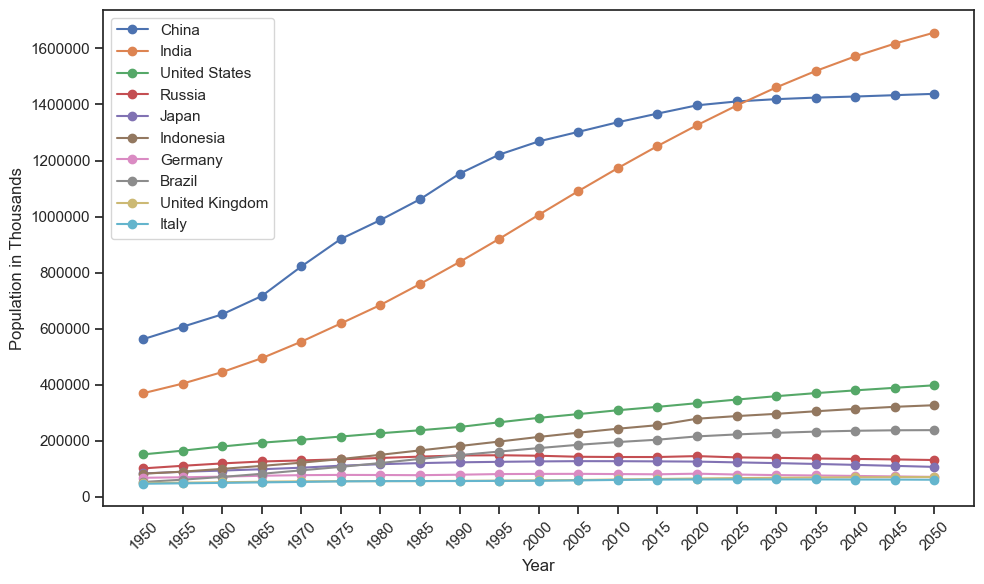

In [164]:
# Exclude 'World'
filtered_df = merged_df[merged_df['Country (or dependent territory)'] != 'World']

# Identify top 10 countries by their 1950 population
top_10 = filtered_df.nlargest(10, '1950')

# Select the year columns (from 1950 to 2050)
years = list(range(1950, 2051, 5))
year_cols = [str(y) for y in years]

# Include only the top 10 countries and the columns
top_10_data = top_10[['Country (or dependent territory)'] + year_cols]

plt.figure(figsize=(10, 6))

# Plot each country's population across the selected years
for i, row in top_10_data.iterrows():
    country = row['Country (or dependent territory)']
    populations = row[year_cols].values
    plt.plot(years, populations, marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Population in Thousands')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(np.arange(1950, 2051, 5), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

5. For the same top 10 most populous contries at 1950, plot the average annual growth for each previous five-year period starting from 1955 to 2050 in 5-year interval. The following figure shows the expected result: ![](https://i.imgur.com/ImXjIo0.png)

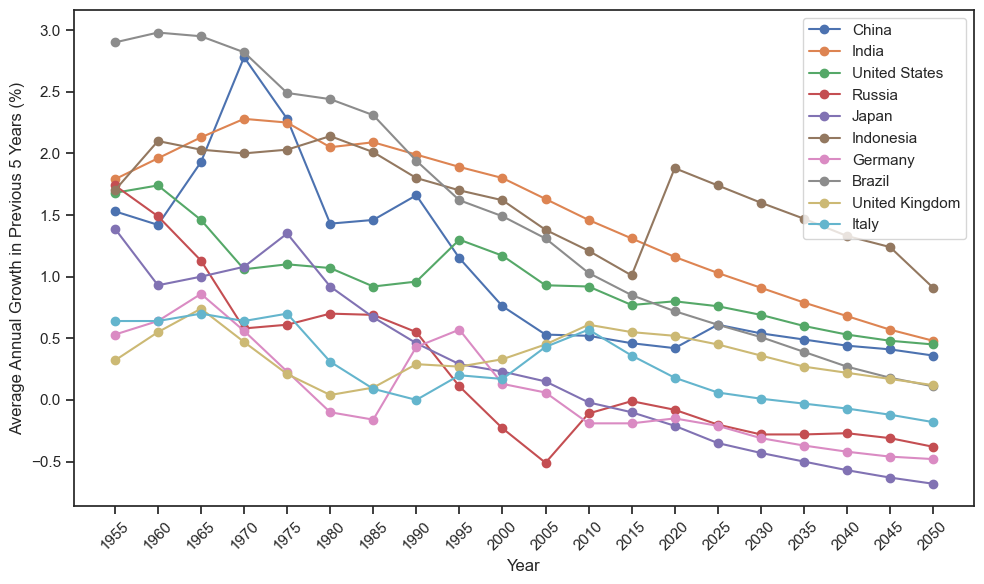

In [165]:
# Exclude 'World'
filtered_df = merged_df[merged_df['Country (or dependent territory)'] != 'World']

# Identify top 10 countries by their 1950 population
top_10 = filtered_df.nlargest(10, '1950')

# Growth columns are assumed to be in the format "% Growth till {year}"
growth_years = list(range(1955, 2051, 5))
growth_cols = [f"% Growth till {y}" for y in growth_years]

# Include only the top 10 countries and the growth columns
top_10_growth = top_10[['Country (or dependent territory)'] + growth_cols]

plt.figure(figsize=(10, 6))

# Plot each country's growth across the selected years
for i, row in top_10_growth.iterrows():
    country = row['Country (or dependent territory)']
    growth_values = row[growth_cols].values
    plt.plot(growth_years, growth_values, marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Average Annual Growth in Previous 5 Years (%)')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(np.arange(1955, 2051, 5), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

6. Map country names to their continents and add a 'continent' column storing the continent names corresponding to the countries. Plot the mean population and average annual growth over the years (1950-2050) for all continents.
- Hint: install the pycountry_convert package and use its methods for converting country names to continent names: https://pypi.org/project/pycountry-convert/

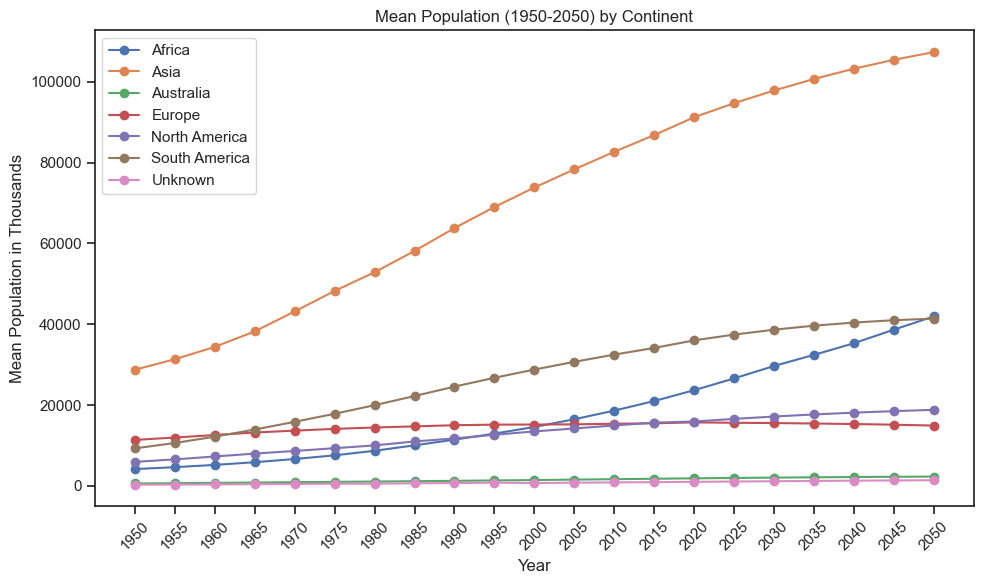

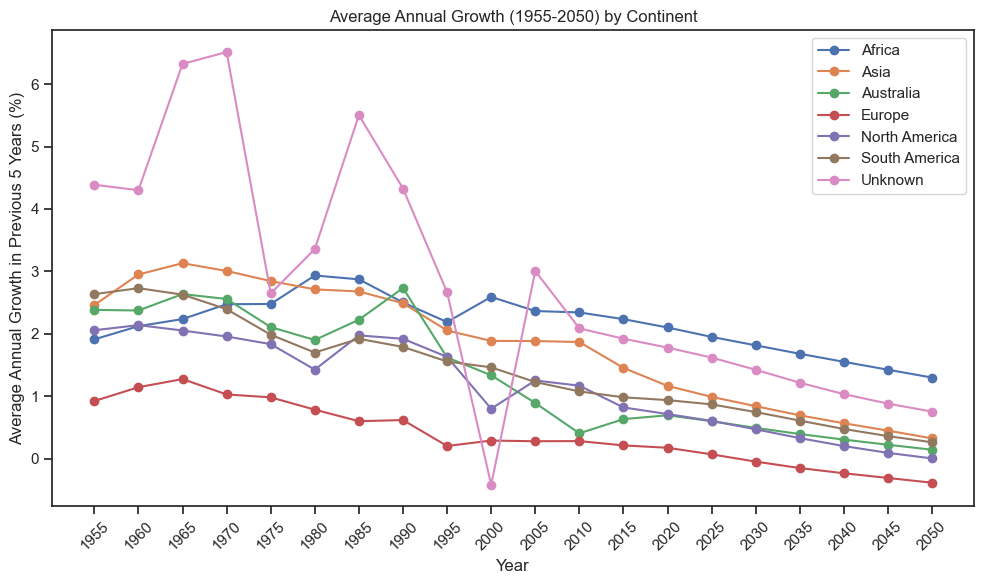

Countries with unknown continent mapping: ['Kosovo', 'Sint Maarten', 'Timor-Leste', 'Western Sahara']


In [166]:
df = merged_df.copy()

# Exclude 'World'
df = df[df['Country (or dependent territory)'] != 'World']

# Mapping to the continents
continents = {
    'AF': 'Africa',
    'AN': 'Antarctica',
    'AS': 'Asia',
    'EU': 'Europe',
    'NA': 'North America',
    'OC': 'Australia',
    'SA': 'South America'
}

# Function to get continent name from country name
def get_continent_name(country_name):
    try:
        # Convert country name to alpha-2 code
        country_alpha2 = country_name_to_country_alpha2(country_name)
        # Convert alpha-2 code to continent code
        continent_code = country_alpha2_to_continent_code(country_alpha2)
        # Map continent code to continent name using the corrected mapping
        return continents.get(continent_code, 'Unknown')
    except:
        # For if there is an issue mapping the country
        return 'Unknown'

# Add a 'continent' column
df['continent'] = df['Country (or dependent territory)'].apply(get_continent_name)

# Define the years for population and growth
pop_years = list(range(1950, 2051, 5))
pop_year_cols = [str(y) for y in pop_years]

growth_years = list(range(1955, 2051, 5))
growth_year_cols = [f"% Growth till {y}" for y in growth_years]

# Group by continent and compute mean population and mean growth
continent_pop_mean = df.groupby('continent')[pop_year_cols].mean()
continent_growth_mean = df.groupby('continent')[growth_year_cols].mean()

# Plot mean population by continent (1950-2050)
plt.figure(figsize=(10,6))
for continent in continent_pop_mean.index:
    plt.plot(pop_years, continent_pop_mean.loc[continent, pop_year_cols].values, marker='o', label=continent)
plt.xlabel('Year')
plt.ylabel('Mean Population in Thousands')
plt.title('Mean Population (1950-2050) by Continent')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(np.arange(1950, 2051, 5), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot average annual growth by continent (1955-2050)
plt.figure(figsize=(10,6))
for continent in continent_growth_mean.index:
    plt.plot(growth_years, continent_growth_mean.loc[continent, growth_year_cols].values, marker='o', label=continent)
plt.xlabel('Year')
plt.ylabel('Average Annual Growth in Previous 5 Years (%)')
plt.title('Average Annual Growth (1955-2050) by Continent')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(np.arange(1955, 2051, 5), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Identify the countires that fall in 'Unknown' continent
unknown_countries = df[df['continent'] == 'Unknown']['Country (or dependent territory)']
print(f"Countries with unknown continent mapping: {unknown_countries.tolist()}")

7. What are the top 5 countries with the highest population growth rate from 1950 to 2020? How does this compare to their projected growth rates from 2020 to 2050? Discuss any notable differences and other factors that should be also considered together with the historical growth data to predict future population changes.

In [167]:
# Exclude 'World'
df = merged_df[merged_df['Country (or dependent territory)'] != 'World'].copy()

# Calculate historical growth rate from 1950 to 2020
df['% Growth from 1950-2020'] = ((df['2020'] - df['1950']) / df['1950']) * 100

# Identify top 5 countries with the highest growth rate from 1950 to 2020
top_5 = df.nlargest(5, '% Growth from 1950-2020')[['Country (or dependent territory)', '1950', '2020', '% Growth from 1950-2020']]

# For these top 5 countries, compute projected growth rate from 2020 to 2050
top_5 = top_5.merge(df[['Country (or dependent territory)', '2050']], on='Country (or dependent territory)', how='left')
top_5['% Growth from 2020-2050'] = ((top_5['2050'] - top_5['2020']) / top_5['2020']) * 100

print("Top 5 countries by population growth rate (1950-2020):")
print(top_5[['Country (or dependent territory)', '1950', '2020', '% Growth from 1950-2020', '2050', '% Growth from 2020-2050']])

Top 5 countries by population growth rate (1950-2020):
  Country (or dependent territory)  1950  2020  % Growth from 1950-2020  2050  \
0                            Qatar    26  2445              9303.846154  2559   
1             United Arab Emirates    72  6496              8922.222222  8019   
2                   Western Sahara    10   653              6430.000000  1174   
3                           Kuwait   145  2994              1964.827586  3864   
4                     Sint Maarten     3    44              1366.666667    54   

   % Growth from 2020-2050  
0                 4.662577  
1                23.445197  
2                79.785605  
3                29.058116  
4                22.727273  


# Insights -
Over time, some countries that grew tremendously from 1950 to 2020 may see much slower growth or even stabilization in the coming decades. For example, while Qatar and the United Arab Emirates experienced dramatic increases initially, their future growth rates are projected to be much more modest. This change can be the result of factors like declining fertility rates, economic shifts, immigration policies, or resource limitations. Additionally, when predicting population trends, it’s important to consider broader elements such as healthcare advancements, climate change, political stability, and cultural shifts. These factors can significantly influence future population patterns beyond what historical data alone might suggest.

## Question 2 [40 marks]: The link: https://yuan-json-api.vercel.app/nobelprize/laureates is a RESTful API endpoint that returns information in JSON about Nobel Prize Laureates. Write Python code to use `requests` to call the RESTful API and read the JSON results. Write program to answer the following questions.
1. Create a Pandas DataFrame containing the laureates information along with the information about their prizes and afflications in flat format. How many unique laureates are in the data set?

2. Develop two distinct methods to identify laureates who have been awarded Nobel prizes more than once, whether in different years or in different categories. Present your findings in a clear and organized manner. This could be displayed in a table format (like a pandas DataFrame).

 - Two separate and distinct approaches could be different algorithmic strategies, Python code, or data structures. For each approach, You need to provide a detailed explanation of the logic behind each method. The explanation should be in the form of comments within your code or as a separate written text accompanying your code.

3. Develop two distinct methods to list the top 5 afiliations by the number of awards. Show the laureates, prizes, and affiliations information. Present your findings in a clear and organized manner. This could be displayed in a table format (like a pandas DataFrame).
 - Two separate and distinct approaches could be using different algorithmic strategies, Python code, or data structures For each approach, you need to provide a detailed explanation of the logic behind each method. The explanation should be in the form of comments within your code or as a separate written text accompanying your code.

4. For the top 5 affiliations, develop two distinct visualizations to represent the counts of each Nobel prize category associated with these affiliations.

 - Two different types of plots could be bar chart, pie chart, line graph, etc. You also could choose to present the information in a single comprehensive figure or multiple figures for each affiliation.

## Answers:

1. Create a Pandas DataFrame containing the laureates information along with the information about their prizes and afflications in flat format. How many unique laureates are in the data set?

In [168]:
# Retrieve data from the API endpoint
url = "https://yuan-json-api.vercel.app/nobelprize/laureates"
response = requests.get(url)
data = response.json()

# Extract the list of laureates from the JSON data
laureates = data.get("laureates", [])

# Storing each flattened record as a dictionary in 'rows'
rows = []

# Loop through each laureate in the dataset
for laureate in laureates:
    # Extract basic laureate information for all of the prizes and affiliations
    base_info = {
        'id': laureate.get('id'),
        'firstname': laureate.get('firstname'),
        'surname': laureate.get('surname'),
        'born': laureate.get('born'),
        'died': laureate.get('died'),
        'bornCountry': laureate.get('bornCountry'),
        'bornCountryCode': laureate.get('bornCountryCode'),
        'bornCity': laureate.get('bornCity'),
        'diedCountry': laureate.get('diedCountry'),
        'diedCountryCode': laureate.get('diedCountryCode'),
        'diedCity': laureate.get('diedCity', None),  # If diedCity doesn't exist, set to None
        'gender': laureate.get('gender')
    }

    # Each laureate can have multiple prizes
    for p in laureate.get('prizes', []):
        # Extract the prize-related details
        prize_info = {
            'prize_year': p.get('year'),
            'prize_category': p.get('category'),
            'prize_share': p.get('share'),
            'prize_motivation': p.get('motivation')
        }

        # Affiliations for this particular prize
        affiliations = p.get('affiliations', [])

        # If there are no affiliations listed, create row with None for affiliation info
        if not affiliations:
            row = {**base_info, **prize_info,
                   'affiliation_name': None,
                   'affiliation_city': None,
                   'affiliation_country': None}
            rows.append(row)
        else:
            # If there are affiliations, create separate row for each one
            for aff in affiliations:
                # If aff is an empty list, no affiliation
                if isinstance(aff, list) and len(aff) == 0:
                    row = {**base_info, **prize_info,
                           'affiliation_name': None,
                           'affiliation_city': None,
                           'affiliation_country': None}
                else:
                    # Extract affiliation details
                    row = {**base_info, **prize_info,
                           'affiliation_name': aff.get('name') if aff else None,
                           'affiliation_city': aff.get('city') if aff else None,
                           'affiliation_country': aff.get('country') if aff else None}
                # Add row to the list
                rows.append(row)

# Convert the list of flattened rows into a DataFrame
df = pd.DataFrame(rows)

# Print the number of unique laureates. 'id' identifies each laureate.
print("Number of unique laureates:", df['id'].nunique())

Number of unique laureates: 922


2. Develop two distinct methods to identify laureates who have been awarded Nobel prizes more than once, whether in different years or in different categories. Present your findings in a clear and organized manner. This could be displayed in a table format (like a pandas DataFrame).

 - Two separate and distinct approaches could be different algorithmic strategies, Python code, or data structures. For each approach, You need to provide a detailed explanation of the logic behind each method. The explanation should be in the form of comments within your code or as a separate written text accompanying your code.


In [169]:
# Method A: Counting by Group
# 1. Group by each laureate's 'id' and count how many rows they have. More rows mean more prizes.
# 2. Filter to keep only those with counts greater than one.
prize_counts = df.groupby('id').size().reset_index(name='count_prizes')
multiple_winners_a = prize_counts[prize_counts['count_prizes'] > 1]
print("Method A: Laureates with more than one prize:")
print(multiple_winners_a)


# Method B: Using Value Counts
# 1. Count how many times each 'id' appears (value_counts).
# 2. Get those that appear more than once.
# 3. Filter the main DataFrame to these 'id's and remove duplicates so we only list each laureate once.
counts = df['id'].value_counts()
multiple_ids = counts[counts > 1].index
multiple_winners_b = df[df['id'].isin(multiple_ids)].drop_duplicates(subset=['id'])
print("\nMethod B: Laureates with more than one prize:")
print(multiple_winners_b[['id','firstname','surname']], '\n')
print(f"Total number of laureates to win more than one Nobel Prize are: {multiple_winners_a.shape[0]}")

Method A: Laureates with more than one prize:
      id  count_prizes
17   114             2
48   142             2
60   153             2
97   189             2
99   190             2
..   ...           ...
888  922             2
906  939             2
908  941             2
909  942             2
910  943             2

[67 rows x 2 columns]

Method B: Laureates with more than one prize:
      id          firstname                surname
5      6              Marie  Curie, née Sklodowska
53    54             Hideki                 Yukawa
62    62            Walther                  Bothe
67    66               John                Bardeen
73    71  Igor Yevgenyevich                   Tamm
..   ...                ...                    ...
958  922               Paul                Modrich
976  939            Michael                Rosbash
979  941             Rainer                  Weiss
981  942           Barry C.                 Barish
983  943             Kip S.                 Tho

# Explanation -
* Method A:
Group all data by each laureate’s ID and count how many entries (prizes) they have. Then pick out who has more than one.
* Method B:
Use value_counts to see how many times each ID appears and select those that appear more than once. Filter the original data for those IDs and remove duplicates.

3. Develop two distinct methods to list the top 5 afiliations by the number of awards. Show the laureates, prizes, and affiliations information. Present your findings in a clear and organized manner. This could be displayed in a table format (like a pandas DataFrame).
 - Two separate and distinct approaches could be using different algorithmic strategies, Python code, or data structures For each approach, you need to provide a detailed explanation of the logic behind each method. The explanation should be in the form of comments within your code or as a separate written text accompanying your code.

In [170]:
# Method A: Counting and Sorting
# 1. Group by affiliation details and count how many awards each affiliation has.
# 2. Sort these counts in descending order to find the top 5.
aff_counts = df.groupby(['affiliation_name','affiliation_city','affiliation_country']).size().reset_index(name='award_count')
aff_counts = aff_counts.sort_values(by='award_count', ascending=False)
print("Method A:")
print("Top 5 affiliations by number of awards:")
print(aff_counts.head(5))

# Method B: Filtering for Details
# 1. Take the top 5 affiliation names from Method A.
# 2. Filter the DataFrame for only these top affiliations.
# 3. Show detailed info about laureates, prizes, and affiliations.
top_5_names = aff_counts.head(5)['affiliation_name'].tolist()
top_5_details = df[df['affiliation_name'].isin(top_5_names)]
print("\nMethod B:")
print("Details for top 5 affiliations (laureates, prizes, affiliations):")
print(top_5_details[['id','firstname','surname','prize_year','prize_category','prize_motivation','affiliation_name','affiliation_city','affiliation_country']])


Method A:
Top 5 affiliations by number of awards:
                                 affiliation_name affiliation_city  \
81                             Harvard University    Cambridge, MA   
148   Massachusetts Institute of Technology (MIT)    Cambridge, MA   
30   California Institute of Technology (Caltech)     Pasadena, CA   
252                      University of California     Berkeley, CA   
219                           Stanford University     Stanford, CA   

    affiliation_country  award_count  
81                  USA           27  
148                 USA           19  
30                  USA           19  
252                 USA           18  
219                 USA           18  

Method B:
Details for top 5 affiliations (laureates, prizes, affiliations):
      id       firstname    surname prize_year prize_category  \
27    28  Robert Andrews   Millikan       1923        physics   
42    43      Carl David   Anderson       1936        physics   
46    47  Ernest Orland

# Explanation -
* Method A: Group all data by each affiliation, count how many prizes they appear in, and pick the top five based on these counts.
* Method B: Once the top affiliations are known, filter the main DataFrame to show all relevant details (laureates, prize info) for those affiliations.

4. For the top 5 affiliations, develop two distinct visualizations to represent the counts of each Nobel prize category associated with these affiliations.

 - Two different types of plots could be bar chart, pie chart, line graph, etc. You also could choose to present the information in a single comprehensive figure or multiple figures for each affiliation.

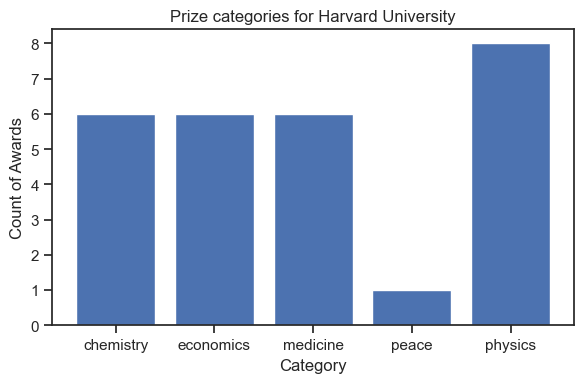

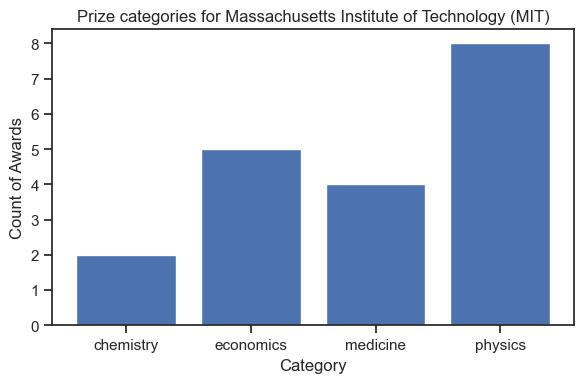

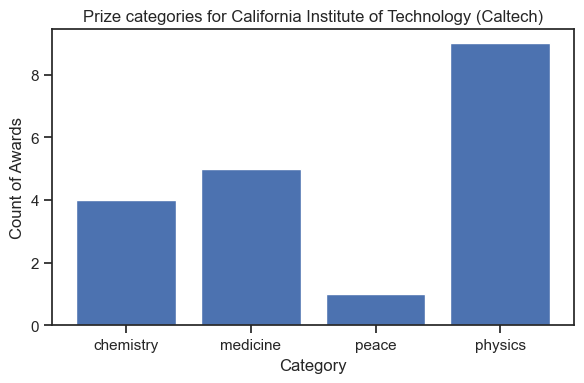

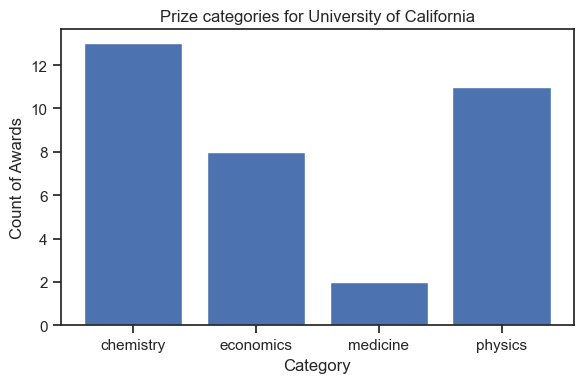

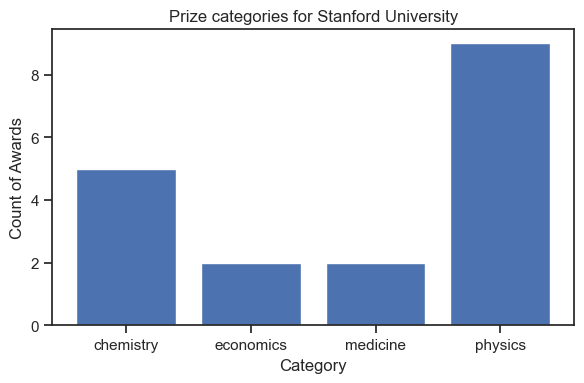

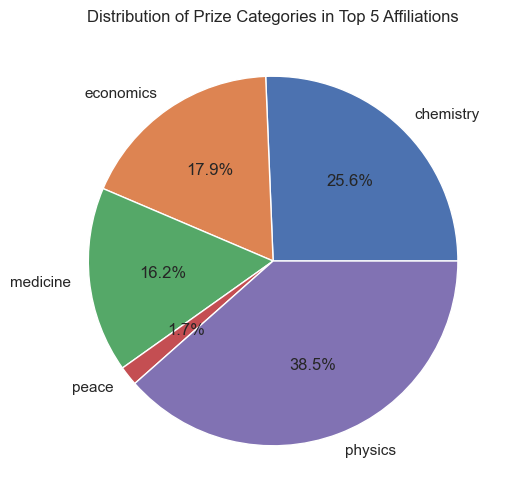

In [171]:
cat_counts = top_5_details.groupby(['affiliation_name','prize_category']).size().reset_index(name='count')

# Visualization 1: Bar chart for each affiliation
for aff in top_5_names:
    subset = cat_counts[cat_counts['affiliation_name'] == aff]
    plt.figure(figsize=(6,4))
    plt.bar(subset['prize_category'], subset['count'])
    plt.title(f"Prize categories for {aff}")
    plt.xlabel("Category")
    plt.ylabel("Count of Awards")
    plt.tight_layout()
    plt.show()

# Visualization 2: Pie chart of total counts by category for top 5 affiliations combined
agg_cat_counts = top_5_details.groupby('prize_category').size()
plt.figure(figsize=(6,6))
plt.pie(agg_cat_counts, labels=agg_cat_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Prize Categories in Top 5 Affiliations")
plt.show()

## Question 3 [20 marks]: The file `weather-samples.csv` contains weather data measured at a weather station for a period of three years. Sensors at the weather station capture weather-related measurements such as air temperature, air pressure, and relative humidity. Load  the data to a pandas DataFrame. Write code to answer the following questions.

1. How many rows contain missing values?
2. How many columns contain missing values?
3. List the numbers of missing values for all columns.
4. For each missing value, fill up it with the mean value of the column where the missing value is located in.
5. Show there is no missing value after filling up.
6. Plot the histogram of the value `relative_humidity_3pm`.
7. A weather forecast problem is to predict a measure in a future time using the measurements at earlier moments. For example, the data set contains several measurements at 9am and one measurement `relative_humidity_3pm` at 3pm. It is interesting to know whether we can predict `relative_humidity_3pm` using the values at 9am. This is a typical supervised machine learning problem. Using plots to visualize the relationships between the measurements at 9am and `relative_humidity_3pm`. What do you find? Discuss the impacts of the measurements at 9am to the values of `relaive_humidity_3pm`.

## Answers:

1. How many rows contain missing values?

In [172]:
df = pd.read_csv('/Users/mustafabookwala/Desktop/Drexel/Pre-Junior/Fall 2024/INFO 212/Week 10/weather-samples.csv')

print(f"Number of rows with missing values: {df.isnull().any(axis=1).sum()}")  # Count how many rows have missing values

Number of rows with missing values: 31


2. How many columns contain missing values?

In [173]:
print(f"Number of columns with missing values: {df.isnull().any(axis=0).sum()}") # Count how many columns have missing values

Number of columns with missing values: 8


3. List the numbers of missing values for all columns.

In [174]:
print(f"Number of missing values per column: \n{df.isnull().sum()}")  # Count missing values per column

Number of missing values per column: 
number                    0
air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64


4. For each missing value, fill up it with the mean value of the column where the missing value is located in.

In [175]:
df_filled = df.fillna(df.mean()) # Replace missing values with column means

5. Show there is no missing value after filling up.

In [176]:
print(f"Total missing values after filling: {df_filled.isnull().sum().sum()}") # Count total missing after filling

Total missing values after filling: 0


6. Plot the histogram of the value `relative_humidity_3pm`.

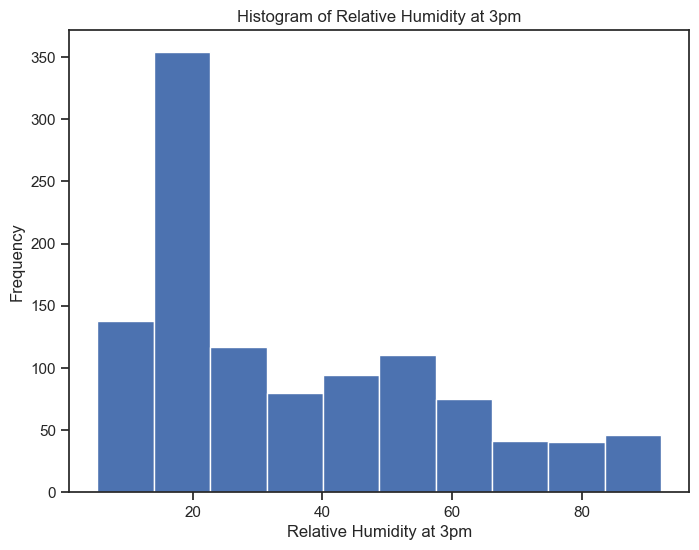

In [177]:
plt.figure(figsize=(8,6)) # Set the figure size
plt.hist(df_filled['relative_humidity_3pm']) # Plot the histogram
plt.title('Histogram of Relative Humidity at 3pm') # Set the title
plt.xlabel('Relative Humidity at 3pm') # Label x-axis
plt.ylabel('Frequency') # Label y-axis
plt.show() # Display the plot

7. A weather forecast problem is to predict a measure in a future time using the measurements at earlier moments. For example, the data set contains several measurements at 9am and one measurement `relative_humidity_3pm` at 3pm. It is interesting to know whether we can predict `relative_humidity_3pm` using the values at 9am. This is a typical supervised machine learning problem. Using plots to visualize the relationships between the measurements at 9am and `relative_humidity_3pm`. What do you find? Discuss the impacts of the measurements at 9am to the values of `relaive_humidity_3pm`.

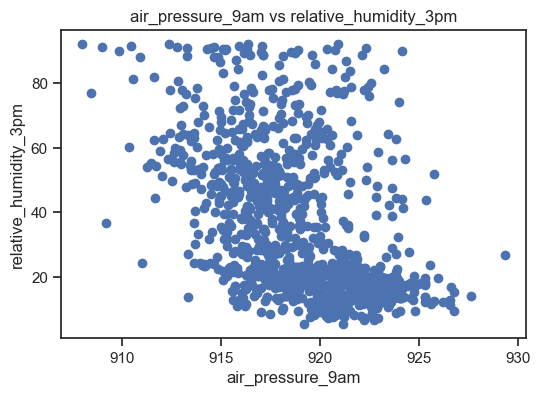

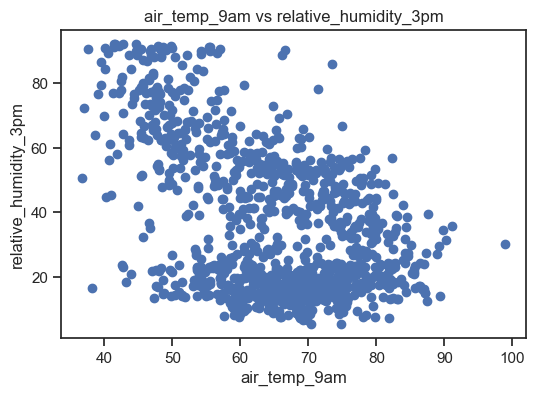

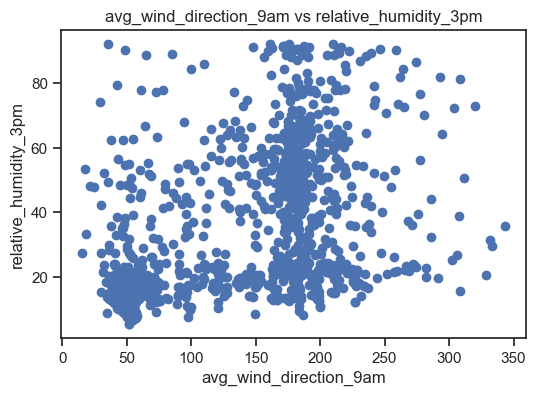

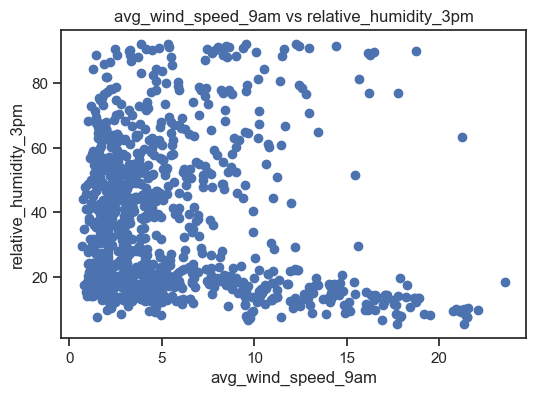

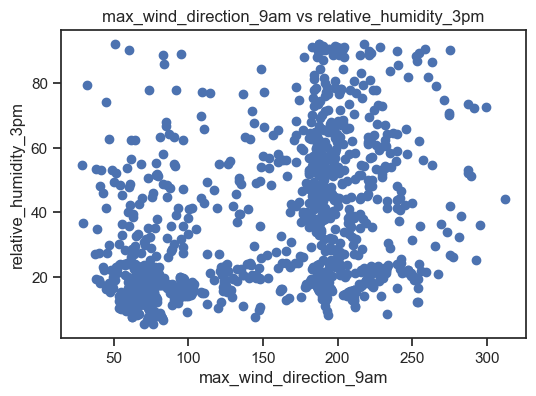

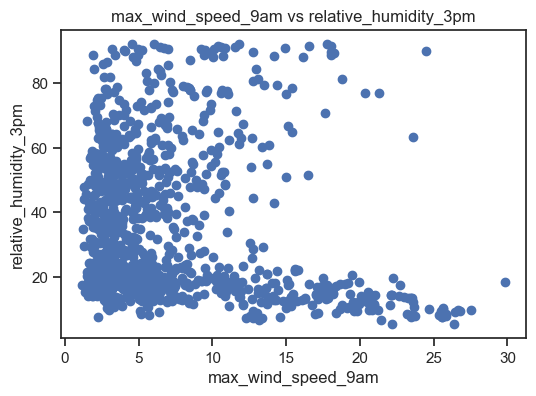

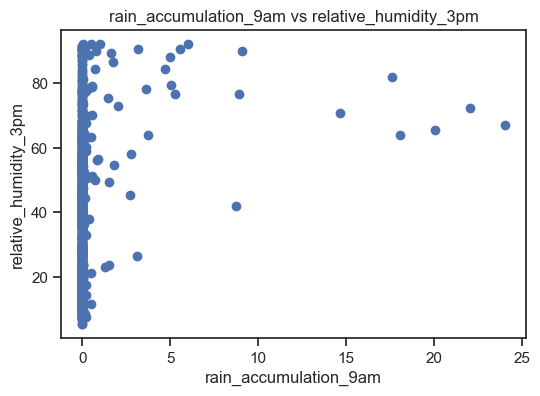

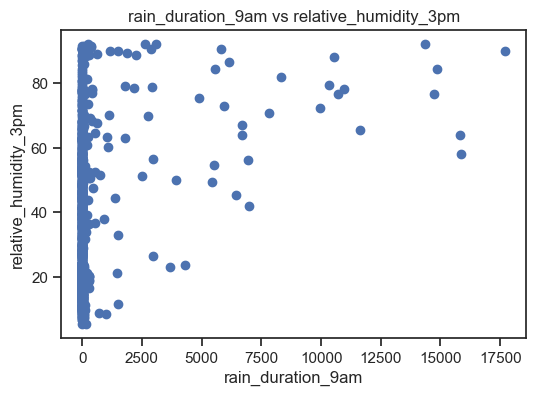

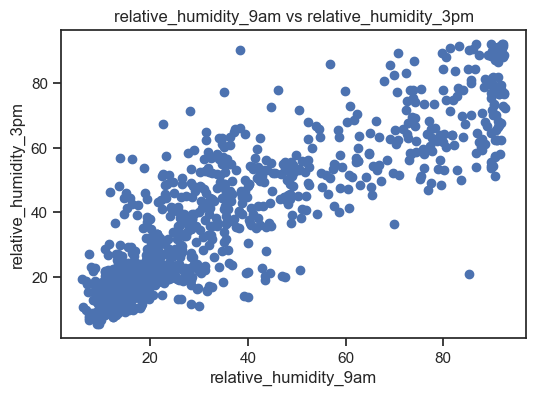

In [178]:
nine_am_columns = [col for col in df_filled.columns if '9am' in col] # Get all columns measured at 9am

for col in nine_am_columns:
    plt.figure(figsize=(6,4)) # Set the figure size
    plt.scatter(df_filled[col], df_filled['relative_humidity_3pm']) # Scatter plot for each 9am measure
    plt.title(f'{col} vs relative_humidity_3pm') # Set the title
    plt.xlabel(col) # Label x-axis
    plt.ylabel('relative_humidity_3pm') # Label y-axis
    plt.show() # Display the plot

# Impacts -
After looking at the scatter plots, I see no strong clear patterns or strong linear relationships. Some variables, like air temperature at 9am, show a slight negative trend with afternoon humidity (as temperature goes up, humidity tends to go down), but overall the relationships look scattered. This means predicting afternoon humidity from just these 9am measures might be challenging and not straightforward. More impacting factors must be considered to reach a conclusion.

## Question 4 [20 marks]: Download the dataset: `activity-data.csv` and load it into a data frame. The data set contains the time series outputs of a wearable clinical device measuring a patient's activities. Write code to answer the following questions:
1. What is the total number of days covered by the dataset? Provide a list of all the distinct calendar dates on which recordings were made.
2. Can you plot the number of steps against the recording 'Datetime', ensuring that each tick on the x-axis corresponds to a unique date in the dataset?
3. Create a plot that shows the daily average number of steps in comparison with the steps recorded each minute. The plot should clearly differentiate between the daily mean and individual minute measurements.
4. How does the average step count change during 15-minute intervals throughout the day? Compute and plot these averages across all days in the dataset.
5. For each day represented in the dataset, what is the percentage of minutes without records (missing records)? Please calculate and present this data
6. For minutes with missing data, fill in 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories' using the mean values for those minutes across all days where data is available. Save the completed dataset to a DataFrame named `all_activity_df` with columns for 'Datetime', 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories'.
7. Could you create plots that illustrate the pairwise relationships between 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories'? After analyzing these plots, what conclusions can you draw about the relationships and potential correlations between these variables?

## Answers:

1. What is the total number of days covered by the dataset? Provide a list of all the distinct calendar dates on which recordings were made.

In [179]:
# Read the CSV into a DataFrame
df = pd.read_csv("/Users/mustafabookwala/Desktop/Drexel/Pre-Junior/Fall 2024/INFO 212/Week 10/activity-data(1).csv")

# Convert the 'Datetime' column to a datetime object
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Dataframe is sorted by datetime
df = df.sort_values('Datetime')

# Extract the date part from the datetime
df['Date'] = df['Datetime'].dt.date

# Get the distinct dates
distinct_dates = df['Date'].unique()
total_days = len(distinct_dates)

print(f"Total number of days covered: {total_days}\n")
print("Distinct dates:")

# For loop to print dates in the desired format
day_count = 1
for d in distinct_dates:
    print("Day {:02d} - {:%m/%d/%Y}".format(day_count, d))
    day_count += 1

Total number of days covered: 23

Distinct dates:
Day 01 - 06/22/2016
Day 02 - 06/23/2016
Day 03 - 06/24/2016
Day 04 - 06/25/2016
Day 05 - 06/26/2016
Day 06 - 06/27/2016
Day 07 - 06/28/2016
Day 08 - 06/29/2016
Day 09 - 06/30/2016
Day 10 - 07/01/2016
Day 11 - 07/02/2016
Day 12 - 07/03/2016
Day 13 - 07/04/2016
Day 14 - 07/05/2016
Day 15 - 07/06/2016
Day 16 - 07/07/2016
Day 17 - 07/08/2016
Day 18 - 07/09/2016
Day 19 - 07/10/2016
Day 20 - 07/11/2016
Day 21 - 07/12/2016
Day 22 - 07/13/2016
Day 23 - 07/14/2016


2. Can you plot the number of steps against the recording 'Datetime', ensuring that each tick on the x-axis corresponds to a unique date in the dataset?


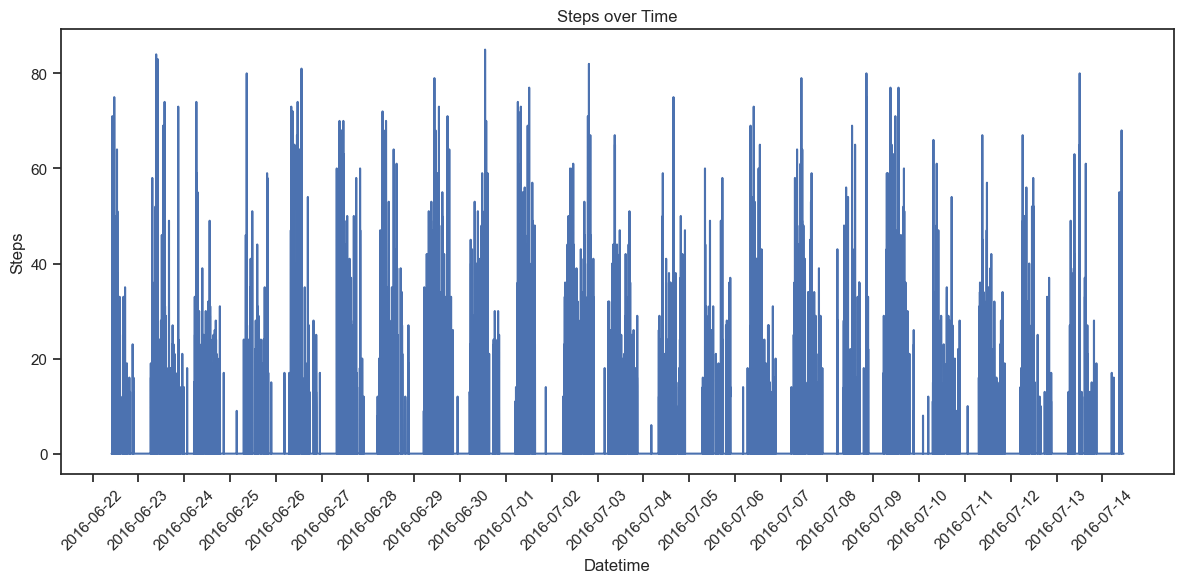

In [180]:
# Create a list of midnights to set as x-axis ticks for each day
daily_midnights = []
for d in distinct_dates:
    daily_midnights.append(pd.to_datetime(str(d)))  # Convert the date object to a datetime

# Create a list of labels
xtick_labels = []
for d in distinct_dates:
    xtick_labels.append(pd.to_datetime(str(d)).strftime('%Y-%m-%d'))

fig, ax = plt.subplots(figsize=(12,6))

# Plotting the steps against time to see how they change daily
ax.plot(df['Datetime'], df['Steps'])
ax.set_xlabel("Datetime")
ax.set_ylabel("Steps")
ax.set_title("Steps over Time")

# Setting the x-ticks to show each day's midnight
ax.set_xticks(daily_midnights)
ax.set_xticklabels(xtick_labels, rotation=45)
plt.tight_layout()
plt.show()

3. Create a plot that shows the daily average number of steps in comparison with the steps recorded each minute. The plot should clearly differentiate between the daily mean and individual minute measurements.

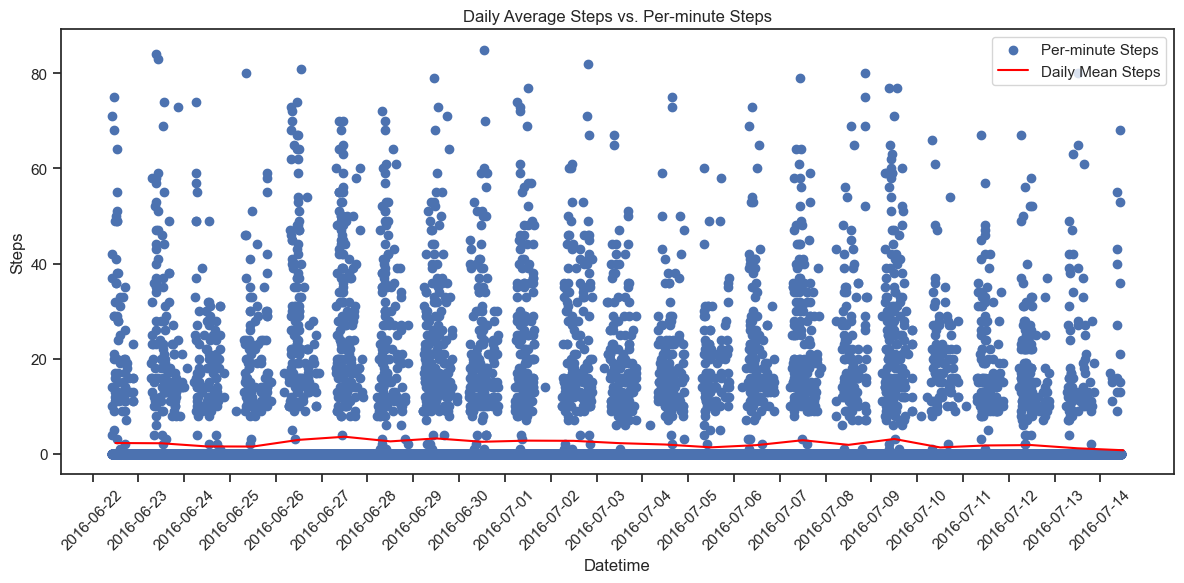

In [181]:
# Calculate the average number of steps taken each day
daily_mean_steps = df.groupby('Date')['Steps'].mean().reset_index()

# Create a list of datetimes at noon each day to represent the daily mean
daily_mean_datetime = []
for d in daily_mean_steps['Date']:
    daily_dt = pd.to_datetime(str(d)) + pd.Timedelta(hours=12)  # Noon time
    daily_mean_datetime.append(daily_dt)

fig, ax = plt.subplots(figsize=(12,6))

# Plotting all the per-minute step data
ax.scatter(df['Datetime'], df['Steps'], label='Per-minute Steps')

# Plotting the daily mean steps in red
ax.plot(daily_mean_datetime, daily_mean_steps['Steps'], color='red', label='Daily Mean Steps')

ax.set_xlabel("Datetime")
ax.set_ylabel("Steps")
ax.set_title("Daily Average Steps vs. Per-minute Steps")
ax.legend()

# Reusing daily_midnights and xtick_labels keep consistent date ticks
daily_midnights = []
xtick_labels = []
for d in distinct_dates:
    dt_val = pd.to_datetime(str(d))
    daily_midnights.append(dt_val)
    xtick_labels.append(dt_val.strftime('%Y-%m-%d'))

ax.set_xticks(daily_midnights)
ax.set_xticklabels(xtick_labels, rotation=45)

plt.tight_layout()
plt.show()

4. How does the average step count change during 15-minute intervals throughout the day? Compute and plot these averages across all days in the dataset.

/var/folders/mw/4snkpx0970n_6rz3jtvq4yxr0000gn/T/ipykernel_86050/1912970452.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df['Time_of_day'] = df['Datetime'].dt.floor('15T').dt.time
/var/folders/mw/4snkpx0970n_6rz3jtvq4yxr0000gn/T/ipykernel_86050/1912970452.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(plt.FixedFormatter(time_labels))


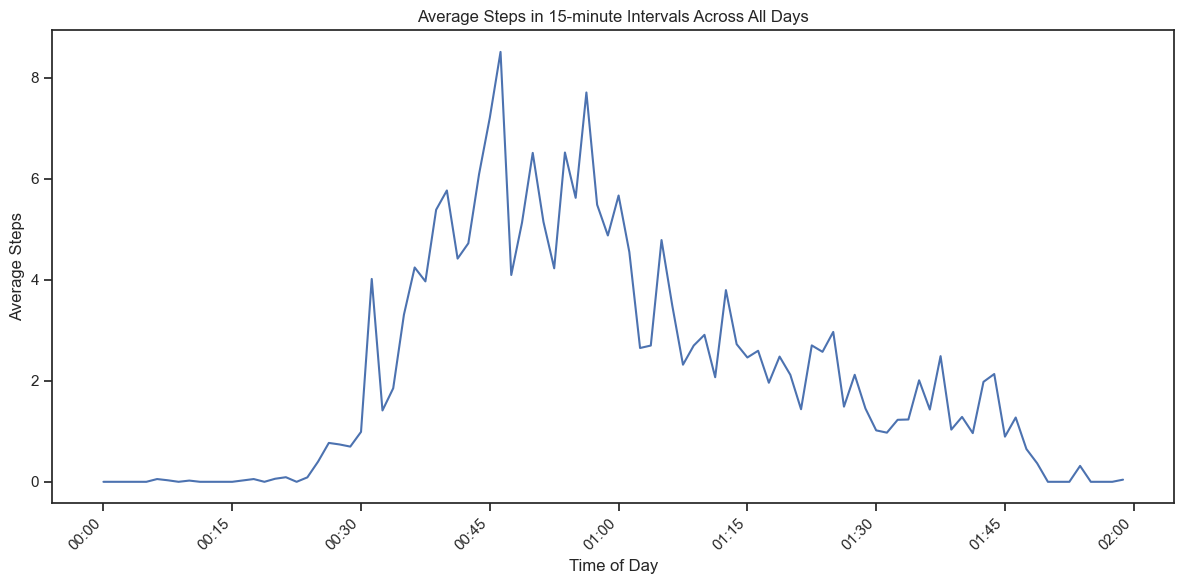

In [182]:
# Extract the time portion to group by time of day
df['Time'] = df['Datetime'].dt.time

# Round down timestamp to the nearest 15 minutes
df['Time_of_day'] = df['Datetime'].dt.floor('15T').dt.time

# Find the average steps at each 15-minute block of the day
interval_mean = df.groupby('Time_of_day')['Steps'].mean().reset_index()

reference_date = pd.to_datetime('2000-01-01')
interval_mean['Interval_dt'] = pd.NaT

# Convert each "Time_of_day" into a full datetime to plot it
for i in range(len(interval_mean)):
    t = interval_mean.loc[i, 'Time_of_day']
    combined_str = str(reference_date.date()) + ' ' + str(t)
    interval_mean.at[i, 'Interval_dt'] = pd.to_datetime(combined_str)

fig, ax = plt.subplots(figsize=(12,6))

# Plotting the average steps for each 15-minute interval
ax.plot(interval_mean['Interval_dt'], interval_mean['Steps'])
ax.set_title("Average Steps in 15-minute Intervals Across All Days")
ax.set_xlabel("Time of Day")
ax.set_ylabel("Average Steps")

# Setting the time labels (HH:MM) for the x-axis
time_labels = []
for dt_val in interval_mean['Interval_dt']:
    time_labels.append(dt_val.strftime('%H:%M'))

ax.xaxis.set_major_formatter(plt.FixedFormatter(time_labels))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


5. For each day represented in the dataset, what is the percentage of minutes without records (missing records)? Please calculate and present this data

In [183]:
# Assuming a full day is 1440 minutes
expected_minutes_per_day = 1440
missing_data = []

for d in distinct_dates:
    day_df = df[df['Date'] == d]
    unique_minutes = len(day_df)
    missing_minutes = expected_minutes_per_day - unique_minutes
    missing_percent = (missing_minutes / expected_minutes_per_day) * 100
    missing_data.append({'Date': d, 'MissingPercent': missing_percent})

missing_df = pd.DataFrame(missing_data)
print(missing_df)


          Date  MissingPercent
0   2016-06-22       41.388889
1   2016-06-23        0.000000
2   2016-06-24        0.000000
3   2016-06-25        0.000000
4   2016-06-26        0.000000
5   2016-06-27        0.069444
6   2016-06-28        0.000000
7   2016-06-29        0.000000
8   2016-06-30        0.000000
9   2016-07-01        0.000000
10  2016-07-02        0.000000
11  2016-07-03        0.000000
12  2016-07-04        0.000000
13  2016-07-05        0.000000
14  2016-07-06        0.000000
15  2016-07-07        0.000000
16  2016-07-08        0.000000
17  2016-07-09        0.000000
18  2016-07-10        0.000000
19  2016-07-11        0.000000
20  2016-07-12        0.000000
21  2016-07-13        0.000000
22  2016-07-14       54.375000


6. For minutes with missing data, fill in 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories' using the mean values for those minutes across all days where data is available. Save the completed dataset to a DataFrame named `all_activity_df` with columns for 'Datetime', 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories'.


In [184]:
# Create an index of all minutes for all days
full_datetimes = []
for d in distinct_dates:
    full_day = pd.date_range(start=pd.to_datetime(d), periods=1440, freq='T')
    for dt_val in full_day:
        full_datetimes.append(dt_val)

full_index = pd.DataFrame({'Datetime': full_datetimes})

# Merge to find missing entries
merged_df = pd.merge(full_index, df, on='Datetime', how='left')

# Find the minute of the day
merged_df['MinuteOfDay'] = merged_df['Datetime'].dt.hour * 60 + merged_df['Datetime'].dt.minute

# Compute the mean values for each minute of the day across all days
minute_means = merged_df.groupby('MinuteOfDay')[['Steps', 'XCnt', 'YCnt', 'ZCnt', 'Calories']].mean()

# Fill missing values with the computed means
filled_df = merged_df.copy()
for col in ['Steps', 'XCnt', 'YCnt', 'ZCnt', 'Calories']:
    filled_df[col] = filled_df.apply(
        lambda row: minute_means.loc[row['MinuteOfDay'], col] if pd.isna(row[col]) else row[col],
        axis=1
    )

all_activity_df = filled_df[['Datetime', 'Steps', 'XCnt', 'YCnt', 'ZCnt', 'Calories']].copy()
print(all_activity_df.head())


/var/folders/mw/4snkpx0970n_6rz3jtvq4yxr0000gn/T/ipykernel_86050/2808152317.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_day = pd.date_range(start=pd.to_datetime(d), periods=1440, freq='T')


             Datetime  Steps       XCnt        YCnt        ZCnt  Calories
0 2016-06-22 00:00:00    0.0  61.409091  104.863636   70.363636  0.171238
1 2016-06-22 00:01:00    0.0  41.772727  101.590909   36.454545  0.148915
2 2016-06-22 00:02:00    0.0  46.227273   52.772727   43.727273  0.068392
3 2016-06-22 00:03:00    0.0  91.409091  164.772727  112.863636  0.275454
4 2016-06-22 00:04:00    0.0  51.333333  137.666667   71.428571  0.190698


7. Could you create plots that illustrate the pairwise relationships between 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories'? After analyzing these plots, what conclusions can you draw about the relationships and potential correlations between these variables?

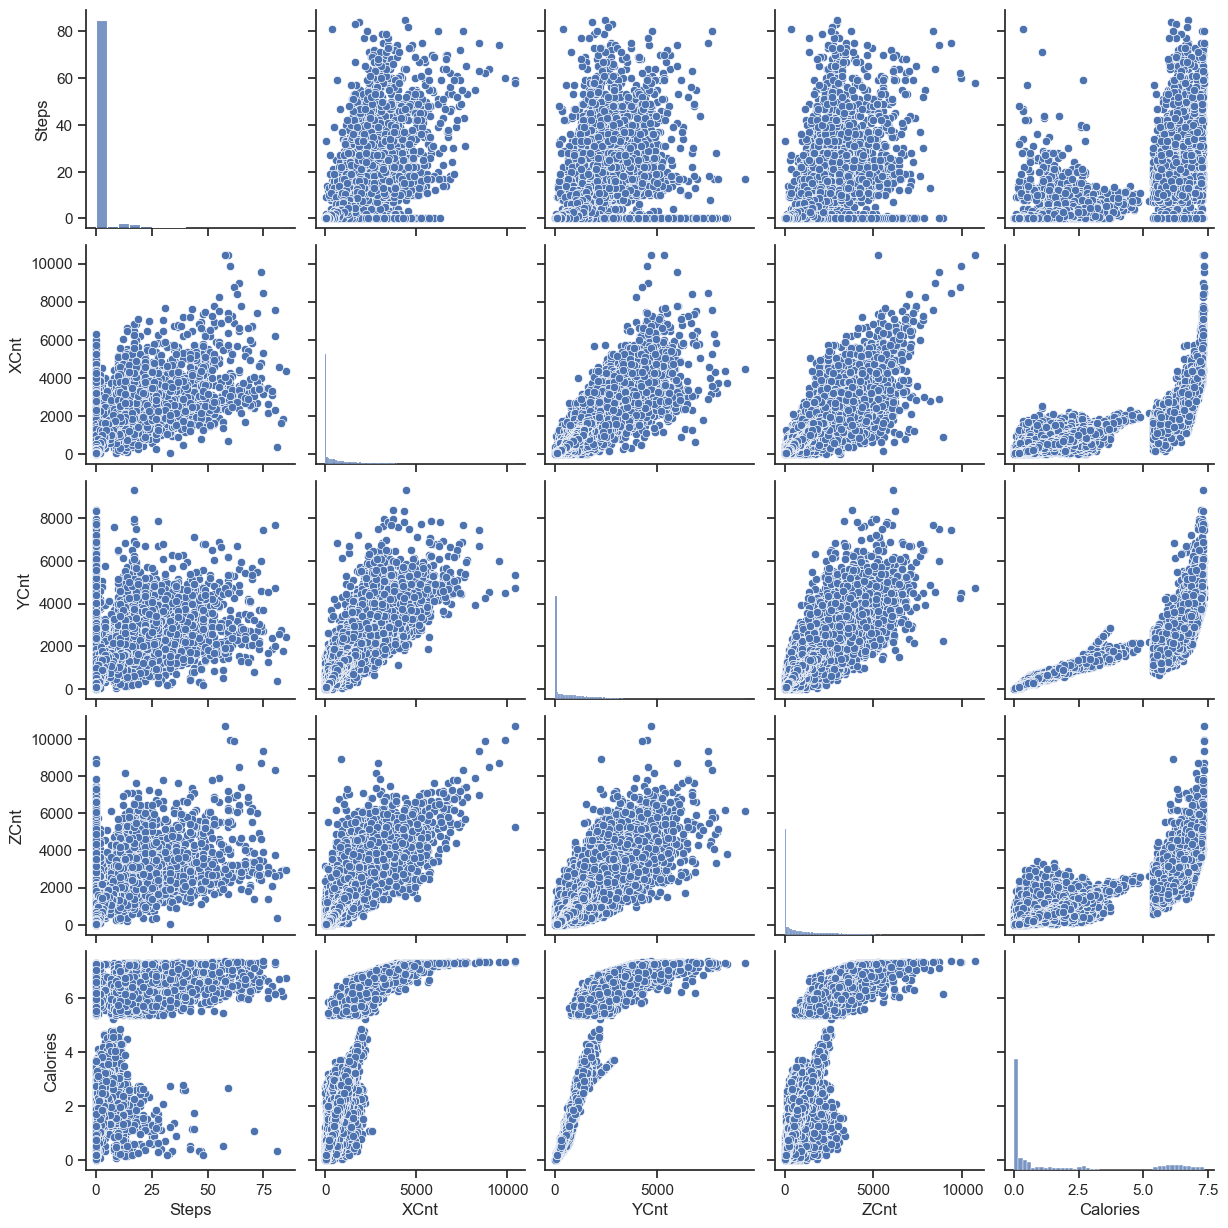

In [185]:
pairplot_df = all_activity_df[['Steps', 'XCnt', 'YCnt', 'ZCnt', 'Calories']]
sns.pairplot(pairplot_df)
plt.show()

# Relationship -
After looking at the pairwise plots, it seems like there are some positive relationships between the step counts and the different count measures (XCnt, YCnt, ZCnt). As steps increase, these counts tend to be higher, suggesting that more movement is associated with more steps. Calories also seem to go up with steps and counts, which makes sense because more movement usually means more energy being used. Overall, the variables seem to be related in a way that reflects that more physical activity (steps and movement on different axes) leads to higher calorie burn and higher weight loss.